# Model 0.1

Initial Position (X0) vs Capture Probability (P)
Fixed seed and equal increments of x0

## Imports

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Sklearn imports
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

np.random.seed(42)

In [5]:
#Fixed seed and equal increments 
#Set up & import dataframe for x0vsP01.dat
filename = 'data/x0vsP01.dat'
x0vsP = pd.read_csv(filename)
x0 = x0vsP['x0'].values
P = x0vsP['P'].values

x0vsP.head()

,x0,P
0,-0.010000,0.6
1,-0.009899,0.6
2,-0.009798,0.6
3,-0.009697,0.6
4,-0.009596,0.6


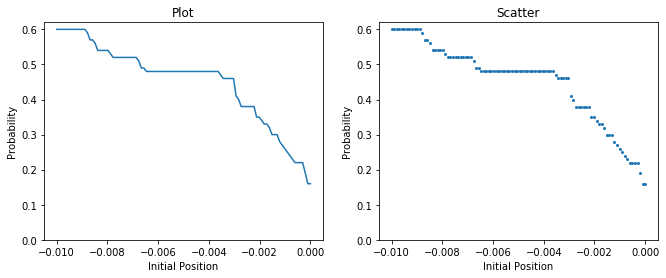

In [6]:
#Graph the data in both scatter and plot

plt.figure(figsize=(11, 4))
plt.subplot(121)
plt.plot(x0,P)
plt.axis([-0.0105, 0.0005, 0.0, 0.62])
plt.ylabel('Probability')
plt.xlabel('Initial Position')
plt.title('Plot')

plt.subplot(122)
plt.scatter(x0,P, s = 4)
plt.axis([-0.0105, 0.0005, 0.0, 0.62])
plt.ylabel('Probability')
plt.xlabel('Initial Position')
plt.title('Scatter')
plt.show()


## Linear Regression

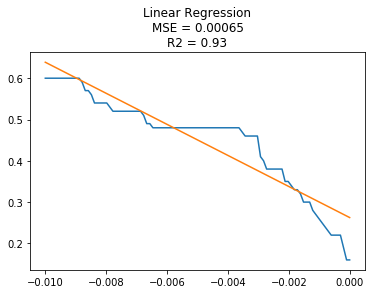

In [7]:
#Apply simple Linear Regression to the data

x0 = x0.reshape(-1,1) #Reshape to fit the model
#Create a traina and test data set
x_train, x_test, y_train, y_test = train_test_split(x0, P, test_size=0.2, random_state=42)

#Train the model
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

#Test the model
y_pred = lin_reg.predict(x_test)
error_mse = mean_squared_error(y_test,y_pred)
error_r2 = r2_score(y_test, y_pred)

#Plot the resulting line
x = np.linspace(-0.01, 0, 20).reshape(-1, 1)
y = lin_reg.predict(x)
plt.plot(x0,P)
plt.plot(x, y)
plt.title("Linear Regression\nMSE = {:.2}\nR2 = {:.2}".format(error_mse,error_r2))
plt.show()

## Random Forrest

In [8]:
#Apply Random Forest

#Train the model
rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)

#Test the model (Error for test and training)
y_pred = rf_reg.predict(x_test)
error_test = mean_squared_error(y_pred,y_test)
y_pred2 = rf_reg.predict(x_train)
error_train = mean_squared_error(y_pred2,y_train)
print("Training Error : {}\nTesting Error: {}".format(error_train, error_test)) # OVERFIT !!!

Training Error : 8.762499999999972e-06
Testing Error: 9.970000000000046e-05


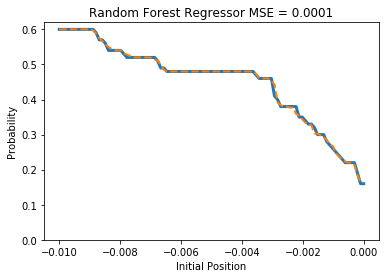

In [9]:
#Graph of the Random Forest Regressor

P2 = rf_reg.predict(x0)
plt.plot(x0,P, linewidth = 3)
plt.axis([-0.0105, 0.0005, 0.0, 0.62])
plt.ylabel('Probability')
plt.xlabel('Initial Position')
plt.plot(x0,P2,linestyle = '--', linewidth = 2)
plt.title("Random Forest Regressor MSE = {:.2}".format(error_test))
#plt.savefig('RFREG.png')
plt.show()